In [31]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
digits=datasets.load_digits()

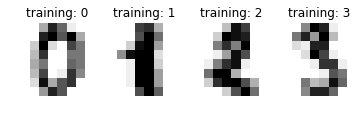

In [32]:
images_and_labels=list(zip(digits.images, digits.target))
for index, (image, label)in enumerate(images_and_labels[:4]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('training: %i'%label)

In [33]:
n_samples=len(digits.images)
data= digits.images.reshape((n_samples, -1))

In [48]:
print("Training...")
classifier=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, early_stopping=False, epsilon=1e-08,
           hidden_layer_sizes=(50, 30, 10), learning_rate='adaptive',
           learning_rate_init=0.0015, max_iter=400, momentum=0.9,
           n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
           random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
           validation_fraction=0.1, verbose=1, warm_start=False)
classifier.fit(data[:n_samples//2:],digits.target[:n_samples//2])

Training...


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 30, 10), learning_rate='adaptive',
       learning_rate_init=0.0015, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 30, 10), learning_rate='adaptive',
       learning_rate_init=0.0015, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        88
           1       0.85      0.90      0.88        91
           2       0.92      0.92      0.92        86
           3       0.93      0.85      0.89        91
           4       0.95      0.90      0.93        92
           5       0.79      0.89      0.84        91
           6       0.97      0.95      0.96        91
           7       0.99      0.89      0.93        89
           8    

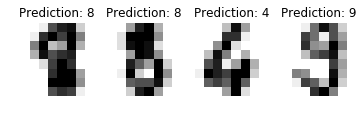

In [50]:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()